# Bank Marketing
![image](image.png)

## Background
The past few marketing campaigns of a Portuguese banking institution have not gone as well as the firm would have hoped, and they are looking for ways to optimize their marketing efforts.

They have supplied me with data from a previous campaign and some additional metrics in order to understand why the campaigns performed so poorly. Those insight will be used in the next campaign in order to boost the performance.

## Missions:

🗺️ Cleaning: Data cleaning and sorting.

🗺️ Explore: What are the jobs of the people most likely to subscribe to a term deposit?

📊 Visualize: Create a plot to visualize the number of people subscribing to a term deposit by month.

🔎 Analyze: What impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit?

In [30]:
suppressPackageStartupMessages(library(tidyverse))

bank_data <- read_delim('data/bank-marketing.csv', delim=";", show_col_types = FALSE)
bank_data

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## Data Dictionary
For the analysis to focus on the problems that led to the failure of previous campaigns that this Bank has deployed, it will not be necessary to use all the variables of the dataset, in this analysis. , I will use 4 variables like below:

| Column | Variable | Class |
| --- | --------------- | --- |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| previous | number of contacts performed before this campaign and for this client | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

[Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) of dataset.

**Citations**: 
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

## Data Cleaning and Sorting

In [31]:
install.packages('readr')
install.packages('dplyr')
install.packages('ggplot2')
library(readr)
library(dplyr)
library(ggplot2)

Installing readr [2.1.4] ...
	OK [linked cache]
Installing dplyr [1.1.2] ...
	OK [linked cache]
Installing ggplot2 [3.4.2] ...
	OK [linked cache]


In [32]:
camp_data <- bank_data %>%
	select(job,month,previous,y)
camp_data

job,month,previous,y
<chr>,<chr>,<dbl>,<chr>
housemaid,may,0,no
services,may,0,no
services,may,0,no
admin.,may,0,no
services,may,0,no
services,may,0,no
admin.,may,0,no
blue-collar,may,0,no
technician,may,0,no


In [33]:
str(camp_data)

tibble [41,188 × 4] (S3: tbl_df/tbl/data.frame)
 $ job     : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ month   : chr [1:41188] "may" "may" "may" "may" ...
 $ previous: num [1:41188] 0 0 0 0 0 0 0 0 0 0 ...
 $ y       : chr [1:41188] "no" "no" "no" "no" ...


In [34]:
for (col in names(camp_data)) {
  cat("\n", col, "\n")
  print(camp_data %>% count(!!sym(col)))
}


 job 
# A tibble: 12 × 2
   job               n
   <chr>         <int>
 1 admin.        10422
 2 blue-collar    9254
 3 entrepreneur   1456
 4 housemaid      1060
 5 management     2924
 6 retired        1720
 7 self-employed  1421
 8 services       3969
 9 student         875
10 technician     6743
11 unemployed     1014
12 unknown         330

 month 
# A tibble: 10 × 2
   month     n
   <chr> <int>
 1 apr    2632
 2 aug    6178
 3 dec     182
 4 jul    7174
 5 jun    5318
 6 mar     546
 7 may   13769
 8 nov    4101
 9 oct     718
10 sep     570

 previous 
# A tibble: 8 × 2
  previous     n
     <dbl> <int>
1        0 35563
2        1  4561
3        2   754
4        3   216
5        4    70
6        5    18
7        6     5
8        7     1

 y 
# A tibble: 2 × 2
  y         n
  <chr> <int>
1 no    36548
2 yes    4640


### issues:
- We see that the column "job" has the value "unknown" and the column "previous" has the values 5, 6 and 7 very few.
- These factors will probably affect the analysis, I will deal with these factors.

In [35]:
camp_data$job[camp_data$job == "unknown"] <- NA
for (i in c(5, 6, 7)) {
  camp_data$previous[camp_data$previous == i] <- NA
}
camp_data <- na.omit(camp_data)
str(camp_data)

tibble [40,834 × 4] (S3: tbl_df/tbl/data.frame)
 $ job     : chr [1:40834] "housemaid" "services" "services" "admin." ...
 $ month   : chr [1:40834] "may" "may" "may" "may" ...
 $ previous: num [1:40834] 0 0 0 0 0 0 0 0 0 0 ...
 $ y       : chr [1:40834] "no" "no" "no" "no" ...
 - attr(*, "na.action")= 'omit' Named int [1:354] 30 36 74 92 145 300 304 344 389 429 ...
  ..- attr(*, "names")= chr [1:354] "30" "36" "74" "92" ...


- After cleaning the data of the dataset "camp_data" we see that this dataset has: 4 columns and 40832 rows.

## Job analysis:
In this section, we'll take a look at the work of time deposit clients, to see if previous campaigns are targeting the right audience.

In [36]:
job_counts <- table(camp_data$job)
job_counts <- sort(job_counts, decreasing = TRUE)
print(job_counts)


       admin.   blue-collar    technician      services    management 
        10413          9254          6738          3969          2920 
      retired  entrepreneur self-employed     housemaid    unemployed 
         1719          1456          1421          1059          1014 
      student 
          871 


In [37]:
job_dep <- table(camp_data$job[camp_data$y == "yes"])
proba <- ((job_dep / table(camp_data$job)) * 100)
proba <- round(proba, 2)
proba


       admin.   blue-collar  entrepreneur     housemaid    management 
        12.93          6.89          8.52          9.92         11.13 
      retired self-employed      services       student    technician 
        25.19         10.49          8.14         31.23         10.80 
   unemployed 
        14.20 

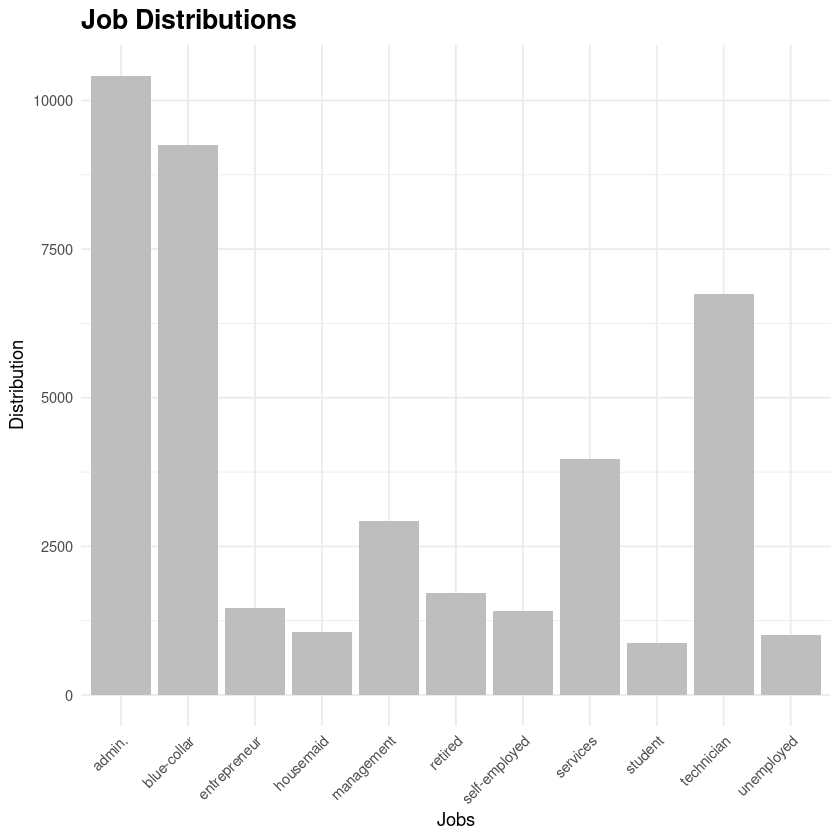

In [38]:
theme_set(theme_bw())
plot1 <- ggplot(camp_data, aes(x = job)) +
  geom_bar(fill = "gray") +
  labs(title = "Job Distributions", x = "Jobs", y = "Distribution") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))
plot1

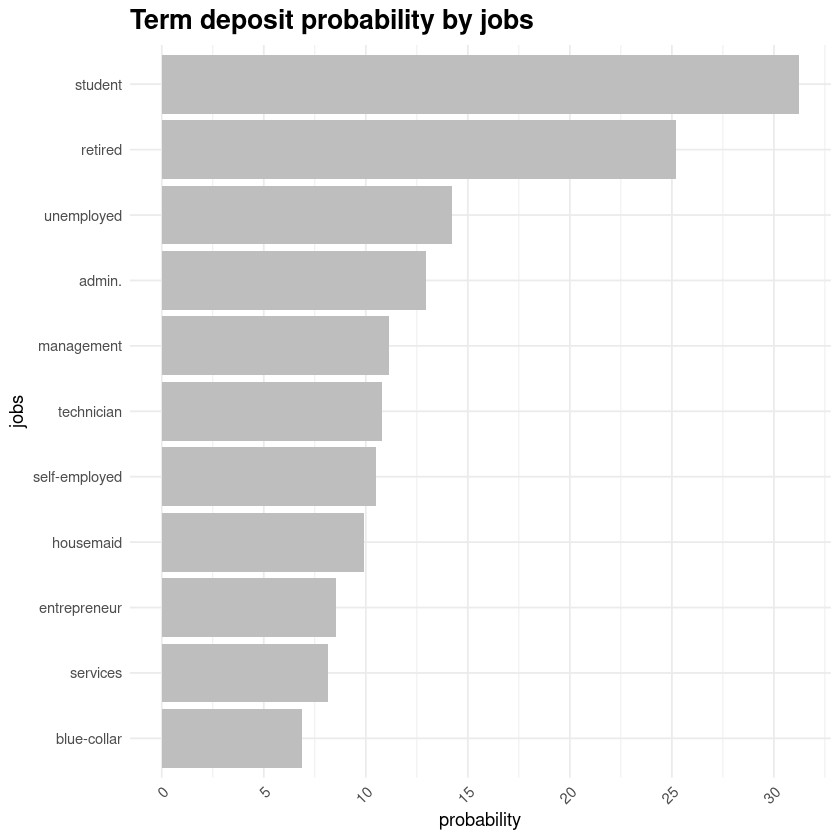

In [39]:
plot2 <- ggplot(data = data.frame(job = names(proba),proba), aes(x = reorder(job, proba), y = proba)) +
  geom_col(fill = "gray") +
  labs(title = "Term deposit probability by jobs", x = "jobs", y = "probability") +
  theme_minimal()+
  theme(plot.title = element_text(size = 16, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))+
  scale_y_continuous(breaks = seq(0, max(proba), by = 5)) +
  coord_flip()
plot2

### Finding 1:
From the two graphs above we see that:
| Jobs | Probability | Probability's position |
| --- | --------------- | --- |
| student	| 31.23%	| 11th /11 |
| retired	| 25.19%	| 6th /11 |
| unemployed	| 14.20%	| 10th /11 |
| admin	| 12.93%	| 01st /11 |
| management	| 11.13%	| 5th /11 |

Students are the type of customer that previous campaigns have reached, but this type of customer has up to 31.23% of the time deposit participation rate.
In addition, retirees and the unemployed are also not at the top of the reach list.

## Month Analysis:
we will analyse how the period(month) of last contact affect the likelihood of people to subscribe to term deposit

Warning message in geom_histogram(stat = "count", position = "stack", alpha = 1):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


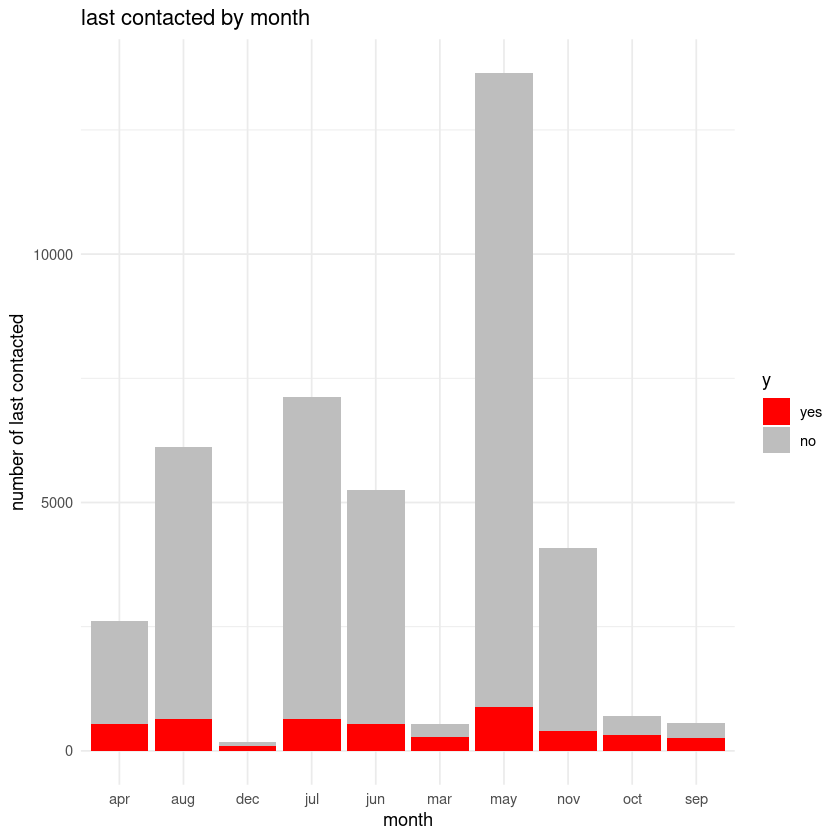

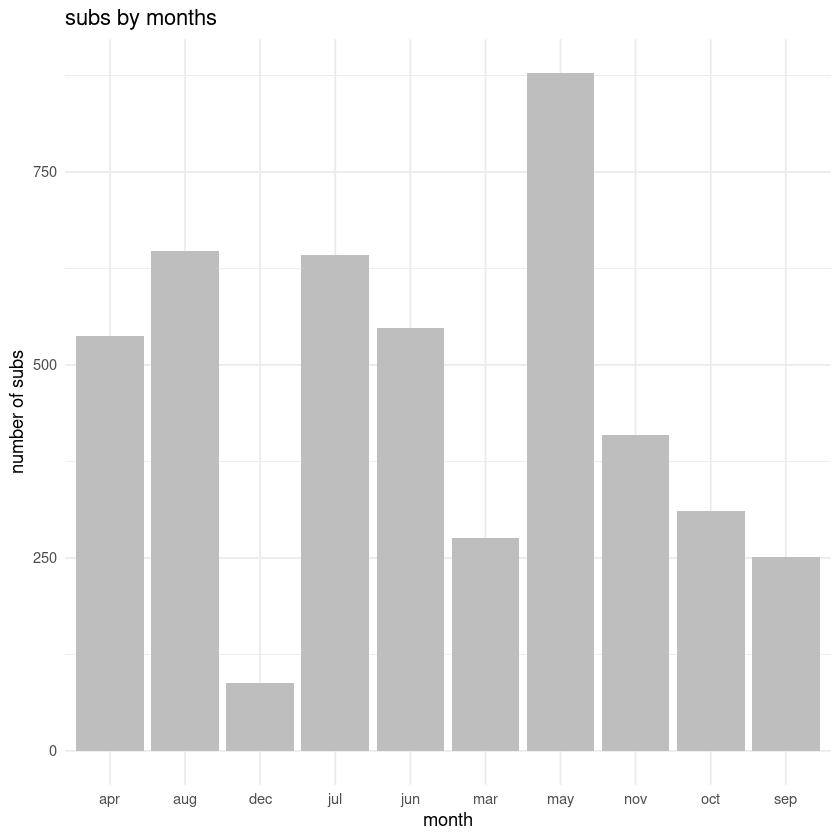

In [40]:
hist_plot1 <- ggplot(camp_data, aes(x = month, fill = y)) +
  geom_histogram(stat = "count", position = "stack", alpha = 1) +
  scale_fill_manual(values = c("red", "gray"), breaks = c("yes", "no")) +
  labs(title = "last contacted by month", y = "number of last contacted") +
  theme_minimal()
subs_plot <- ggplot(camp_data %>% filter(y == "yes"), aes(x = month)) +
  geom_bar(fill = "gray", alpha = 1) +
  labs(title = "subs by months", y = "number of subs") +
  theme_minimal()
hist_plot1
subs_plot

### Finding 2:
The campaign promoted the term deposit product by calling customers with the highest number of registrations in May with more than 800 registrations, followed by August, July and June.

## Previous campaign effects analysis

In [41]:
t <- table(camp_data$previous)
a <- table(camp_data$previous[camp_data$y == "yes"])
b <- (a/t) * 100
print(t)
print(a)
print(b)


    0     1     2     3     4 
35270  4536   744   214    70 

   0    1    2    3    4 
3119  959  344  127   38 

       0        1        2        3        4 
 8.84321 21.14198 46.23656 59.34579 54.28571 


### Findind 3:
We note that the higher the number of contact performed the previous campaign, the higher is the probability to subscribe. this is the case until we reach 3 numbers of contact. At this point it seems like increasing the number of contacs have a diminishing effect on on the probability to subscribe.

## conclusion and recomendations
### 1. Jobs analysis

| Jobs | Probability | Probability's position |
| --- | --------------- | --- |
| student	| 31.23%	| 11th /11 |
| retired	| 25.19%	| 6th /11 |
| unemployed	| 14.20%	| 10th /11 |
| admin	| 12.93%	| 01st /11 |
| management	| 11.13%	| 5th /11 |

During my analysis I found that the client types of jobs that were the most targeted were admin, blue collar, and technician, just to mention a few; while the types of jobs with the highest probability to subscribe were at the bottom of the list. This might be one of the reasons why the campaigns performed poorly. Therefore, re-center the campaigns around the public that is more open to subscriptions might help in a future campaign.

## 2. Months analysis

The majority of subscriptions based on when was the last contact revealed that clients contacted lastly in May are the ones that subscribed the more. But that can be explained by the fact that almost double the number of clients were lastly contacted during this period compared to the other ones. To enhance performance, contacting the same number of clients during the other periods might increase performance. However, there is perhaps a more efficient way to determine the periods that seem more effective than the others. Indeed it seems that August, July, June, and April might be better periods than May since they seem to have a higher probability of positive returns

## 4. Previous campaign effects analysis

During our analysis, I came to the conclusion that the most effective number of contact during the previous campaign was 3, people that were contacted more than 3 times seem more reluctant to subscribe. So targeting the category of people that were contacted 3 times in the previous campaign, for future campaigns might lead to a performance boost.